#### Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)


import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import random
random.seed(0)

# Applied Question
#8 page 286

### a. Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100.

https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

In [2]:
x = np.random.normal(0, 1, 100)
e = np.random.normal(0, 1, 100)
np.mean(e**2)

1.235593307083604

### b. 	Generate a response vector Y of length n = 100 according to the model 			Y =β_0  + β_1 X + β_2 X^2  + β_3 X^3  + ε, 				    where β_0, β_1, β_2, and β_3 are constants of your choice. 

In [3]:
B0 = 1
B1 = 10
B2 = 100
B3 = 1000
y = B0+B1*x+B2*x**2+B3*x**3+e

### c. 	Use forward stepwise selection in order to select a model containing the predictors X,X^2,...,X^10. What is the model obtained according to C_p? Report the coefficients of the model obtained. 

https://www.w3schools.com/python/pandas/pandas_dataframes.asp

In [4]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
print(X)

           x        x2        x3        x4         x5         x6         x7  \
0   1.101967  1.214332  1.338154  1.474602   1.624963   1.790656   1.973244   
1  -1.139328  1.298069 -1.478927  1.684983  -1.919749   2.187224  -2.491967   
2  -1.752596  3.071594 -5.383264  9.434688 -16.535200  28.979530 -50.789418   
3  -0.142898  0.020420 -0.002918  0.000417  -0.000060   0.000009  -0.000001   
4  -0.483733  0.233997 -0.113192  0.054755  -0.026487   0.012812  -0.006198   
..       ...       ...       ...       ...        ...        ...        ...   
95 -0.692600  0.479695 -0.332237  0.230107  -0.159372   0.110381  -0.076450   
96  0.723777  0.523853  0.379153  0.274422   0.198621   0.143757   0.104048   
97 -0.212704  0.045243 -0.009623  0.002047  -0.000435   0.000093  -0.000020   
98  0.382337  0.146182  0.055891  0.021369   0.008170   0.003124   0.001194   
99  0.593123  0.351795  0.208658  0.123760   0.073405   0.043538   0.025823   

              x8            x9           x10  
0   

As shown in the ISLP textbook. 

In [5]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [6]:
design = MS(X.columns).fit(X)
Y = y
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale


In [7]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x', 'x10', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9')

In [8]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x', 'x10', 'x2', 'x3')

In [9]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x', 'x2', 'x3', 'x4']).fit_transform(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.321e+08
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:13:23   Log-Likelihood:                -148.02
No. Observations:                 100   AIC:                             306.0
Df Residuals:                      95   BIC:                             319.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6691      0.168      3.982      0.000       0.336       1.003
x             10.2628      0.220     46.565      0.000       9.825      10.700
x2           100.2803      0.278    360.417      0.000      99.728     100.833
x3           999.9811      0.077    1.3e+04      0.000     999.828    1000.134
x4            -0.0501      0.065     -0.772      0.442      -0.179       0.079
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.232
Skew:                           0.412   Prob(JB):                        0.120
Kurtosis:                       3.580   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
results.mse_model

276126778.360591

### d.	Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)? 

In [11]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

design = MS(X.columns).fit(X)
Y = y
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale

In [12]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='backwards',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x', 'x10', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9')

In [13]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x', 'x10', 'x2', 'x3')

In [14]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x', 'x2', 'x3', 'x4']).fit_transform(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.321e+08
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:13:24   Log-Likelihood:                -148.02
No. Observations:                 100   AIC:                             306.0
Df Residuals:                      95   BIC:                             319.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6691      0.168      3.982      0.000       0.336       1.003
x             10.2628      0.220     46.565      0.000       9.825      10.700
x2           100.2803      0.278    360.417      0.000      99.728     100.833
x3           999.9811      0.077    1.3e+04      0.000     999.828    1000.134
x4            -0.0501      0.065     -0.772      0.442      -0.179       0.079
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.232
Skew:                           0.412   Prob(JB):                        0.120
Kurtosis:                       3.580   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results.mse_model

276126778.360591

### e.	Now fit a lasso model to the simulated data  
As shown in the textbook. 

In [16]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
Y = y
D = design.fit_transform(X)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))



In [17]:

K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
print('Lambda', tuned_lasso.alpha_)
print('-Log Lambda', -np.log(tuned_lasso.alpha_))

Lambda 3.321025839864578
-Log Lambda -1.2002737231124812


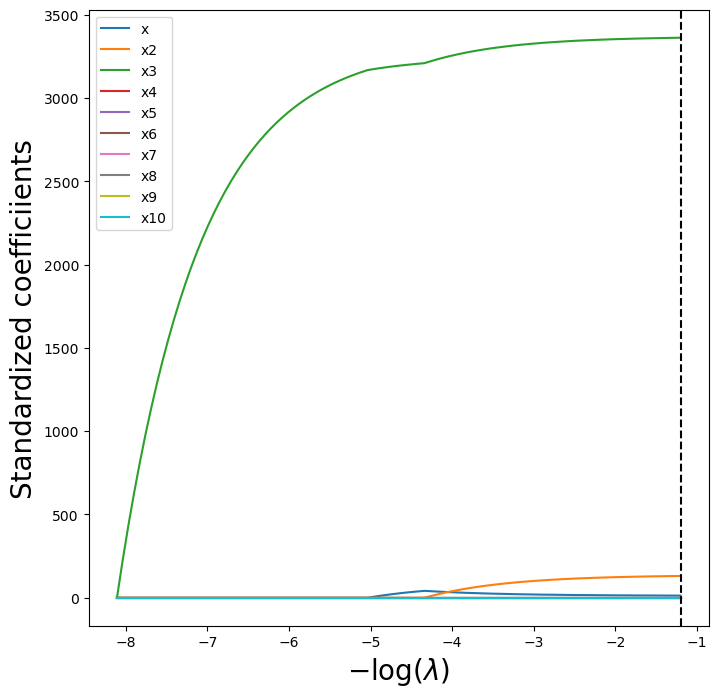

In [18]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [19]:
np.min(tuned_lasso.mse_path_.mean(1))


51.67780717820629

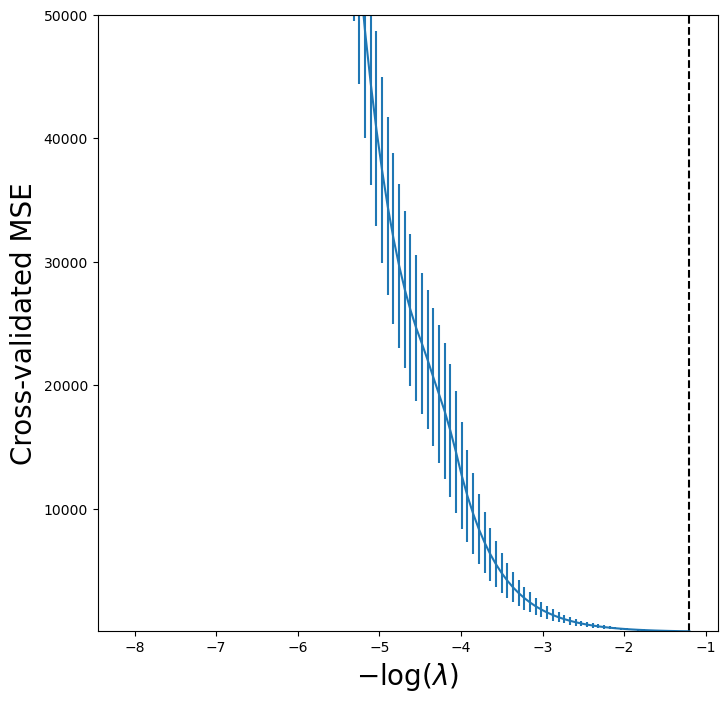

In [20]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([100,50000])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [21]:
print(tuned_lasso.coef_)
print(tuned_lasso.intercept_)

[  12.82602065  130.62688944 3361.30334121    0.            0.
    0.            0.            0.            0.            0.        ]
-199.7206656238184


https://www.kirenz.com/blog/posts/2019-08-12-python-lasso-regression-auto/

R squared training set 100.0
int -199.7206656238184
coef [  12.82602065  130.62688944 3361.30334121    0.            0.
    0.            0.            0.            0.            0.        ]
MSE 41.65681493009407


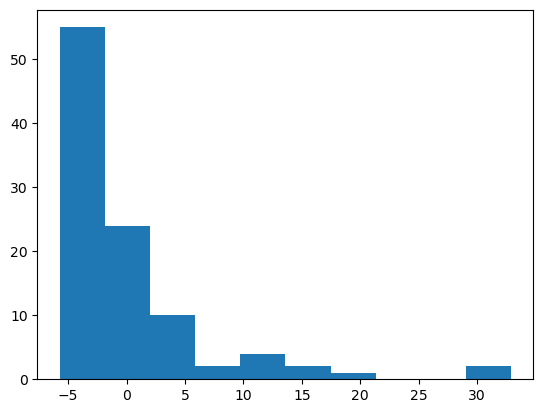

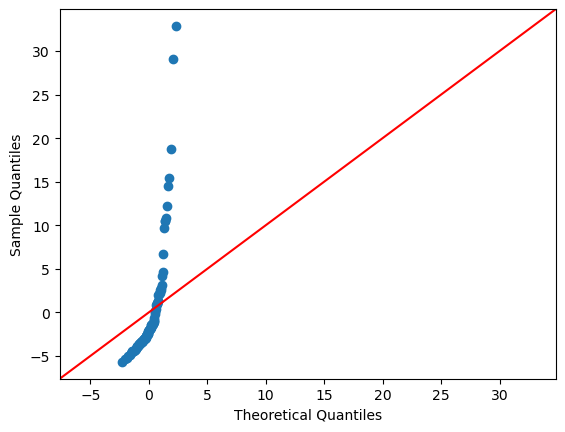

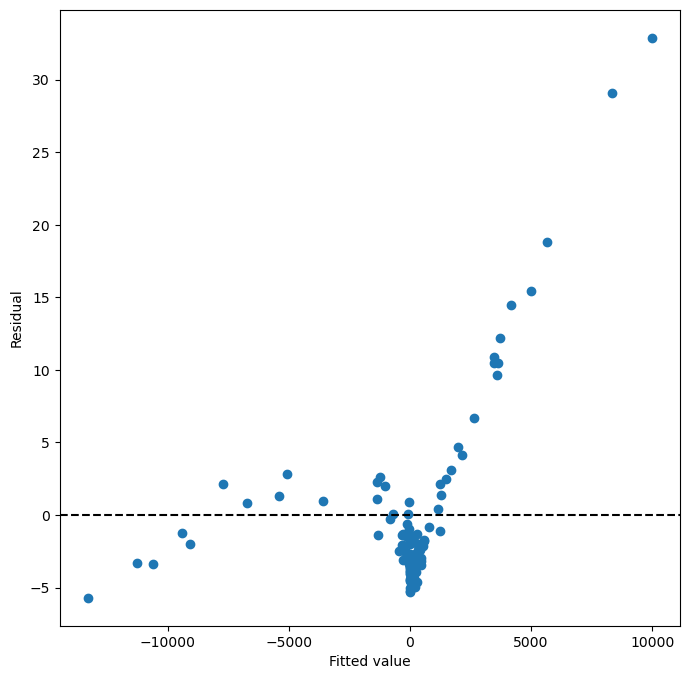

In [22]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))
print('int', reg.intercept_)
print('coef', reg.coef_)

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### f. Now generate a response vector Y according to the model Y =β_0  + β_7 X^7+ ε, and perform forward stepwise selection and the lasso. Discuss the results obtained.

#### Forward

In [23]:
B7 = 10000000
y2 = B0+B7*x**7+e
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

In [24]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [25]:
design = MS(X.columns).fit(X)
Y = y2
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale
sigma2

1.1864933105535338

In [26]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x7',)

In [27]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x', 'x7')

##### Forward based on MSE

In [28]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x7']).fit_transform(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.501e+19
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:13:26   Log-Likelihood:                -150.14
No. Observations:                 100   AIC:                             304.3
Df Residuals:                      98   BIC:                             309.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8520      0.111      7.652      0.000       0.631       1.073
x7              1e+07      0.001   6.71e+09      0.000       1e+07       1e+07
==============================================================================
Omnibus:                        1.430   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                0.931
Skew:                           0.197   Prob(JB):                        0.628
Kurtosis:                       3.260   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE 1.1793430326853178


43

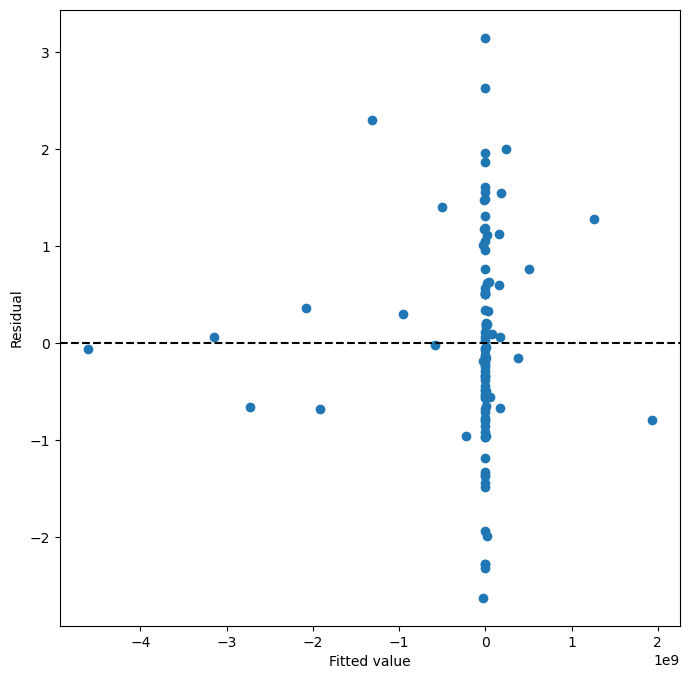

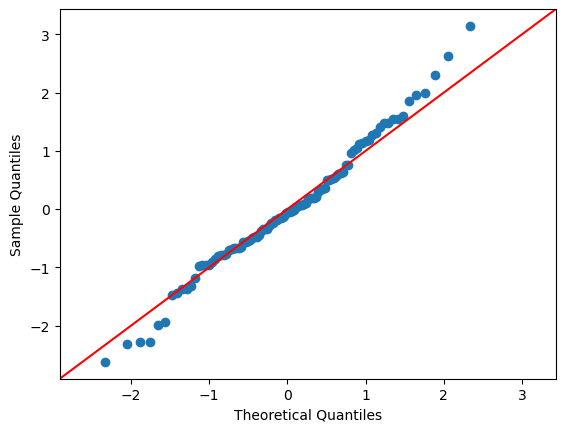

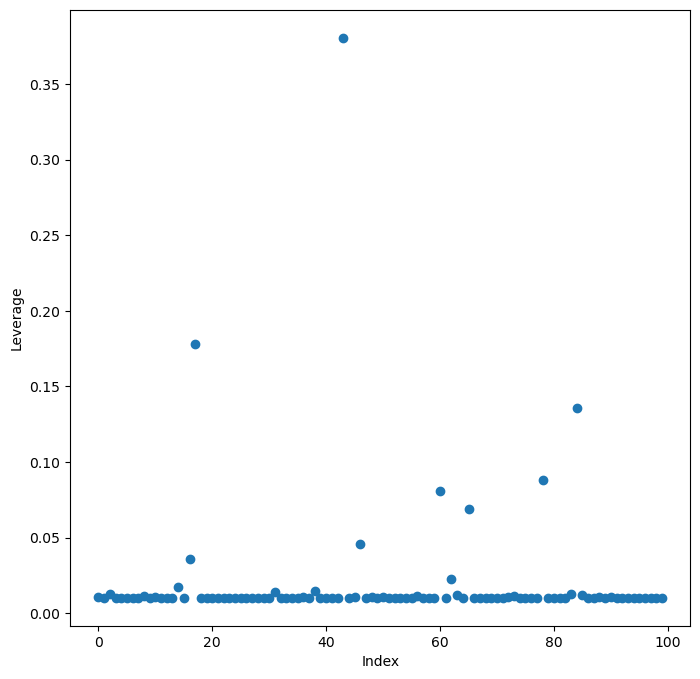

In [29]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 
print('MSE',np.mean(results.resid**2))

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

##### Forward based on Cp

In [30]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x3', 'x7']).fit_transform(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.245e+19
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:13:26   Log-Likelihood:                -149.74
No. Observations:                 100   AIC:                             305.5
Df Residuals:                      97   BIC:                             313.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8353      0.113      7.389      0.000       0.611       1.060
x3             0.0727      0.082      0.888      0.377      -0.090       0.235
x7              1e+07      0.004   2.67e+09      0.000       1e+07       1e+07
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.569
Skew:                           0.265   Prob(JB):                        0.456
Kurtosis:                       3.310   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE 1.16982859929188


43

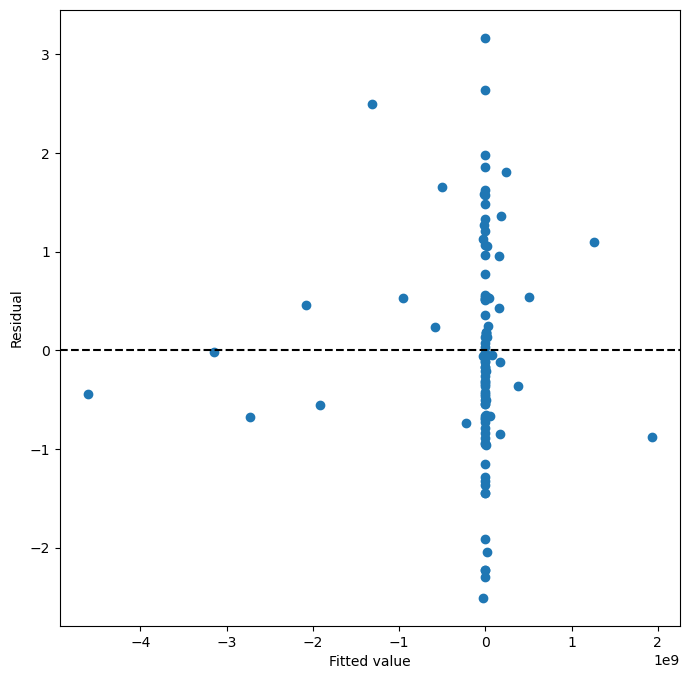

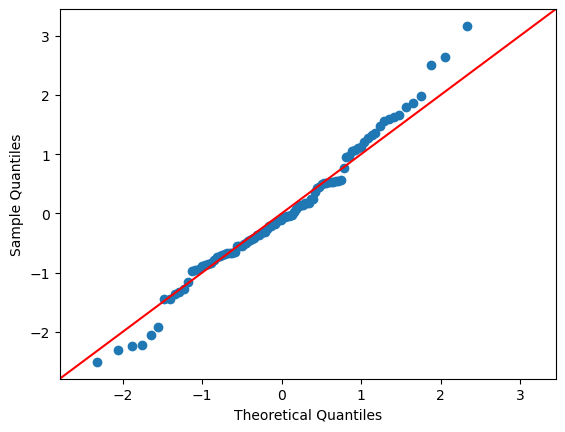

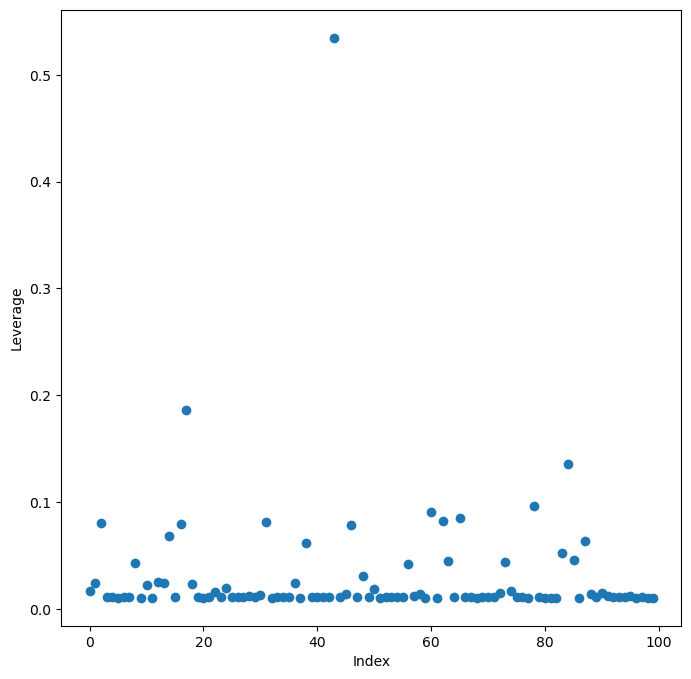

In [31]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 
print('MSE',np.mean(results.resid**2))

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

#### Lasso

In [32]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
Y = y2

D = design.fit_transform(X)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

In [33]:

K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
print('Lambda', tuned_lasso.alpha_)
print('-Log Lambda', -np.log(tuned_lasso.alpha_))

Lambda 735937.0422262764
-Log Lambda -13.508899853598791


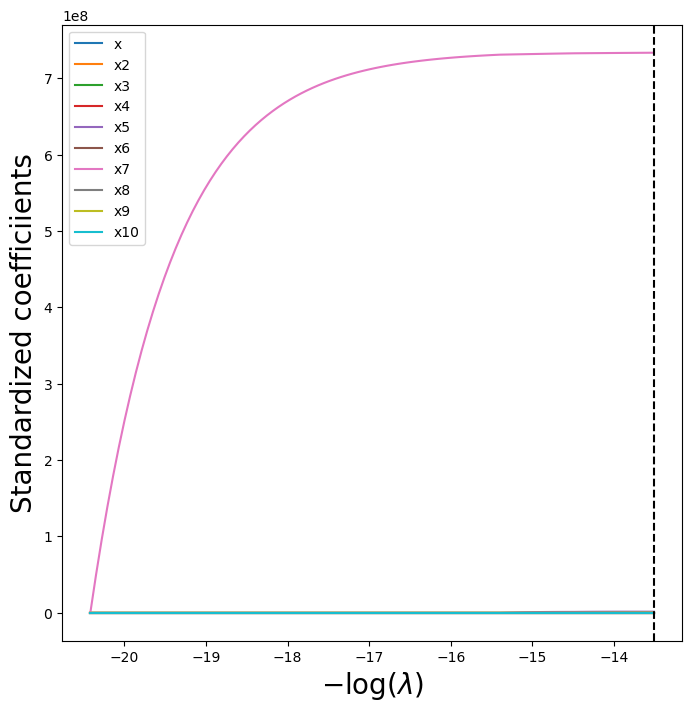

In [34]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [35]:
np.min(tuned_lasso.mse_path_.mean(1))


2218342217525.7783

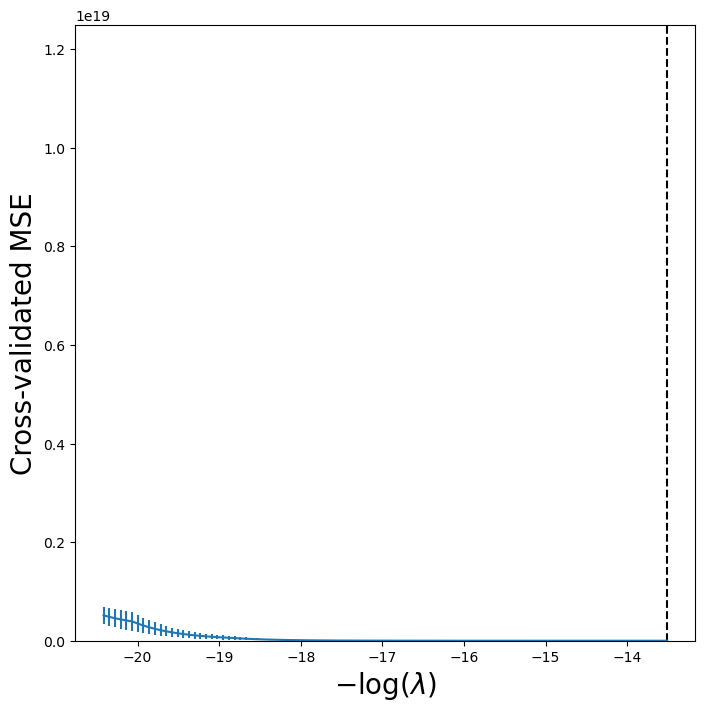

In [36]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,1.25e19])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [37]:
print(tuned_lasso.coef_)
print(tuned_lasso.intercept_)

[-3.27968109e+06 -7.24136868e+05  0.00000000e+00 -0.00000000e+00
  1.21571592e+08 -0.00000000e+00  4.78189000e+08  0.00000000e+00
  1.40136697e+08  0.00000000e+00]
-127765138.59067212


R squared training set 100.0
MSE 24234921974490.875


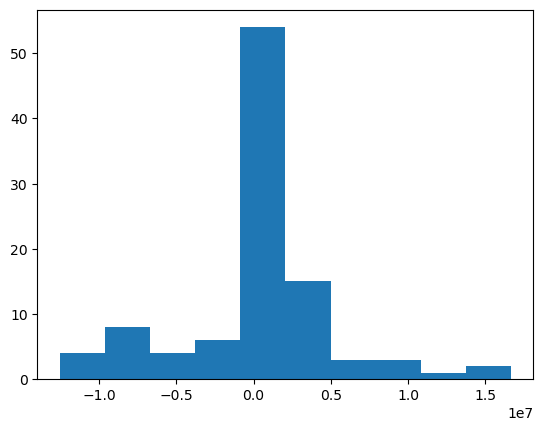

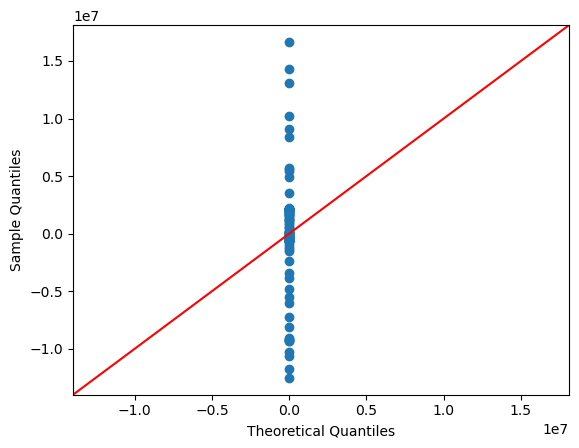

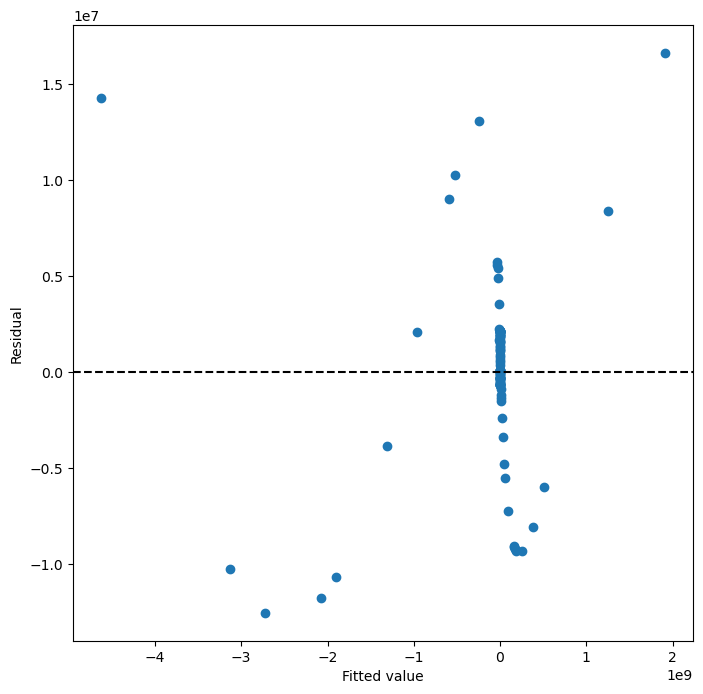

In [38]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

# Abalone Dataset Competition

### Import Data

In [88]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from matplotlib.pyplot import subplots


In [89]:
# Import and view the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

abalone = pd.read_csv('train.csv')
print(abalone['Sex'].value_counts())

abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first = False)
print(abalone)

print('Missing Rings: ', np.isnan(abalone['Rings']).sum())

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64
          id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0          0   0.550     0.430   0.150        0.7715          0.3285   
1          1   0.630     0.490   0.145        1.1300          0.4580   
2          2   0.160     0.110   0.025        0.0210          0.0055   
3          3   0.595     0.475   0.150        0.9145          0.3755   
4          4   0.555     0.425   0.130        0.7820          0.3695   
...      ...     ...       ...     ...           ...             ...   
90610  90610   0.335     0.235   0.075        0.1585          0.0685   
90611  90611   0.555     0.425   0.150        0.8790          0.3865   
90612  90612   0.435     0.330   0.095        0.3215          0.1510   
90613  90613   0.345     0.270   0.075        0.2000          0.0980   
90614  90614   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0     

## Data Visualization

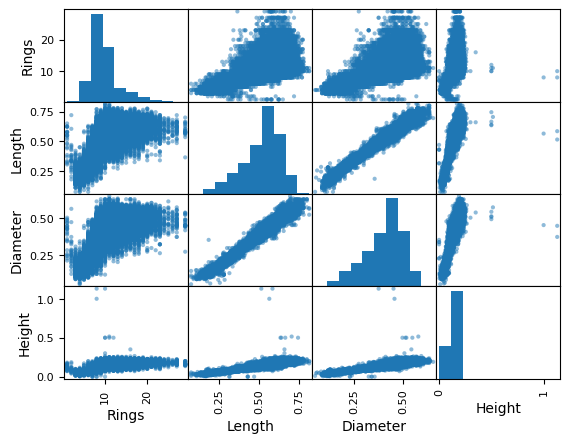

In [90]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Length',
                                 'Diameter',
                                   'Height']]);

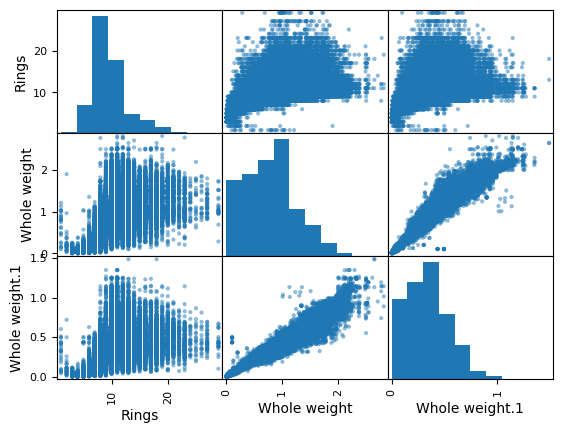

In [91]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight',
                                 'Whole weight.1']]);

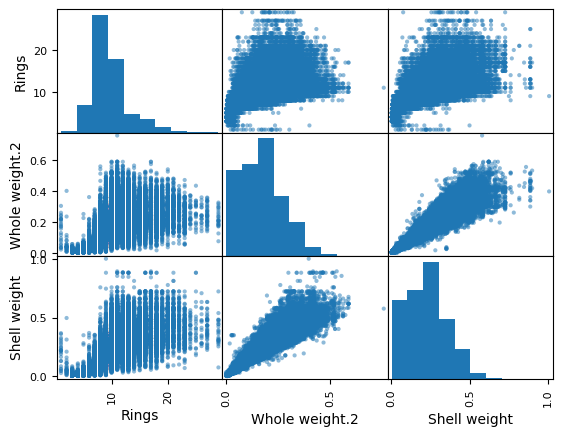

In [92]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight.2',
                                 'Shell weight']]);

## Model 1: Regularization

### Normalize Y

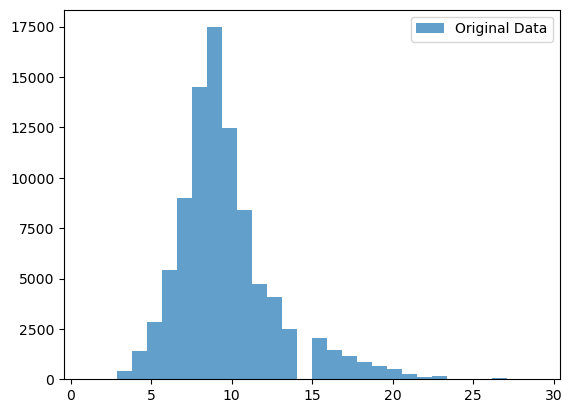

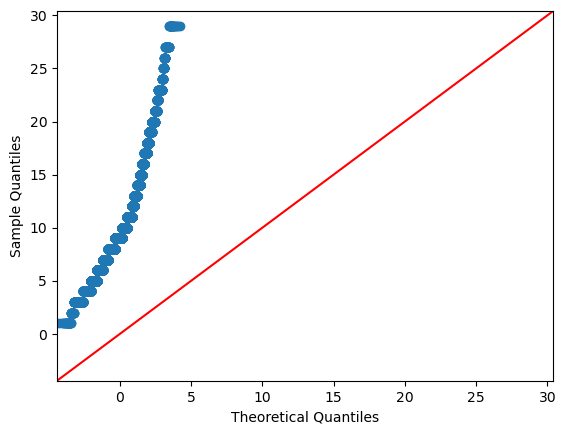

In [93]:
data = abalone['Rings'].to_numpy().reshape(-1, 1)


plt.hist(data, bins=30, alpha=0.7, label='Original Data')
plt.legend()

sm.qqplot(abalone['Rings'], line ='45') 
plt.show()


https://www.geeksforgeeks.org/powertransformer-in-scikit-learn/  
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PowerTransformer.html


In [94]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = abalone['Rings'].to_numpy().reshape(-1, 1)
print(pt.fit(data))
print(pt.lambdas_)
data2 = pt.transform(data)
print(data2)


PowerTransformer()
[0.00897431]
[[ 0.54528173]
 [ 0.54528173]
 [-1.3405492 ]
 ...
 [-1.3405492 ]
 [-1.3405492 ]
 [-0.46238995]]


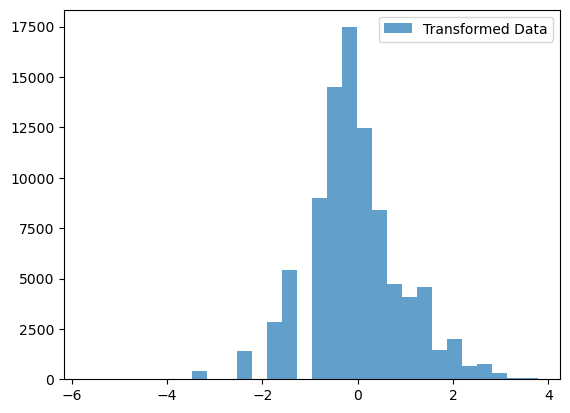

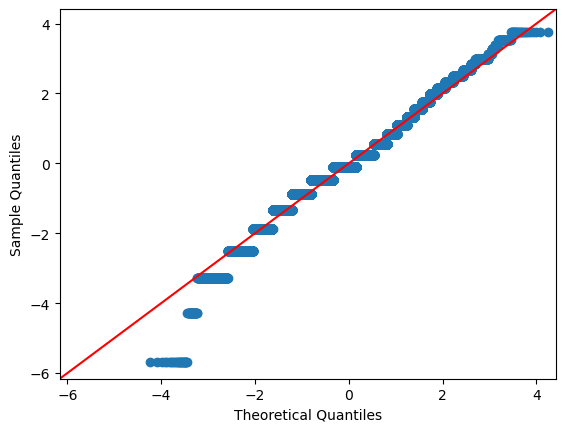

In [95]:
abalone['Rings'] = data2

plt.hist(data2, bins=30, alpha=0.7, label='Transformed Data')
plt.legend()

sm.qqplot(abalone['Rings'], line ='45') 

plt.show()


## Ridge Regression

In [96]:
design = MS(abalone.columns.drop('Rings')).fit(abalone)
Y = np.array(abalone['Rings'])
D = design.fit_transform(abalone)
D = D.drop(['intercept', 'id', 'Sex_I'], axis=1)
X = np.asarray(D)

In [97]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45307.49840991601, tolerance: 9.061500000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

(9, 100)

In [98]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_M
negative log(lambda),,,,,,,,,
-18.420681,7.156358e-09,7.258694e-09,7.344788e-09,6.733133e-09,5.833856e-09,6.481390e-09,7.363281e-09,3.204151e-09,2.691453e-09
-18.188096,9.030300e-09,9.159432e-09,9.268071e-09,8.496251e-09,7.361492e-09,8.178586e-09,9.291406e-09,4.043180e-09,3.396228e-09
-17.955512,1.139495e-08,1.155789e-08,1.169498e-08,1.072105e-08,9.289149e-09,1.032021e-08,1.172442e-08,5.101915e-09,4.285554e-09
-17.722928,1.437879e-08,1.458441e-08,1.475739e-08,1.352843e-08,1.172158e-08,1.302262e-08,1.479455e-08,6.437886e-09,5.407755e-09
-17.490343,1.814398e-08,1.840343e-08,1.862171e-08,1.707095e-08,1.479095e-08,1.643268e-08,1.866860e-08,8.123691e-09,6.823813e-09
...,...,...,...,...,...,...,...,...,...
3.674833,1.676473e-01,2.703993e-01,2.885654e-01,7.471702e-02,-6.063768e-01,-1.127765e-01,5.711275e-01,1.118692e-01,1.124033e-01
3.907417,1.660388e-01,2.798160e-01,2.868858e-01,9.045049e-02,-6.421714e-01,-1.202995e-01,5.926909e-01,1.114527e-01,1.124723e-01
4.140001,1.637331e-01,2.888576e-01,2.848164e-01,1.079401e-01,-6.746877e-01,-1.273843e-01,6.101673e-01,1.109831e-01,1.124308e-01


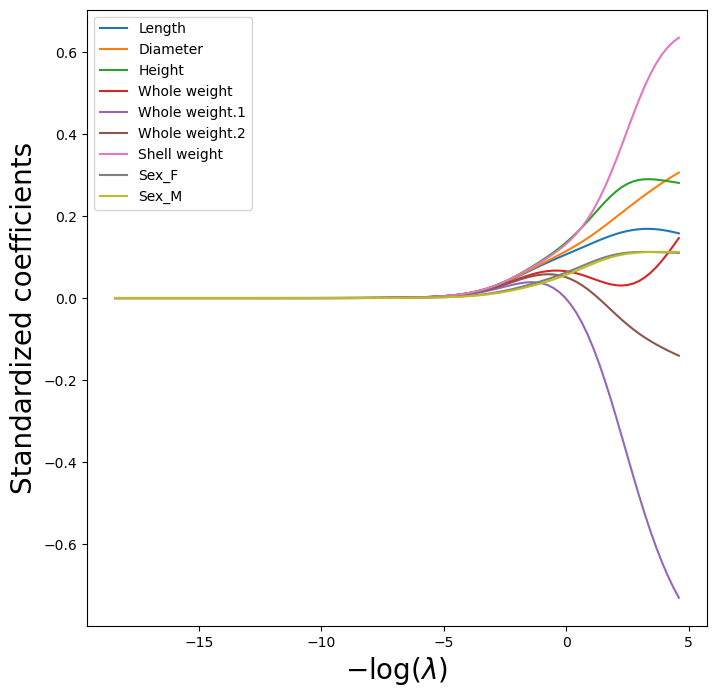

In [99]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [100]:
scaler = StandardScaler(with_mean=True,  with_std=True)
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36183.10136517205, tolerance: 7.236620528034802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([1.00000000e+08, 7.92482898e+07, 6.28029144e+07, 4.97702356e+07,
       3.94420606e+07, 3.12571585e+07, 2.47707636e+07, 1.96304065e+07,
       1.55567614e+07, 1.23284674e+07, 9.77009957e+06, 7.74263683e+06,
       6.13590727e+06, 4.86260158e+06, 3.85352859e+06, 3.05385551e+06,
       2.42012826e+06, 1.91791026e+06,...
       8.30217568e-01, 6.57933225e-01, 5.21400829e-01, 4.13201240e-01,
       3.27454916e-01, 2.59502421e-01, 2.05651231e-01, 1.62975083e-01,
       1.29154967e-01, 1.02353102e-01, 8.11130831e-02, 6.42807312e-02,
       5.09413801e-02, 4.03701726e-02, 3.19926714e-02, 2.53536449e-02,
       2.00923300e-02, 1.59228279e-02, 1.26185688e-02, 1.00000000e-02]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

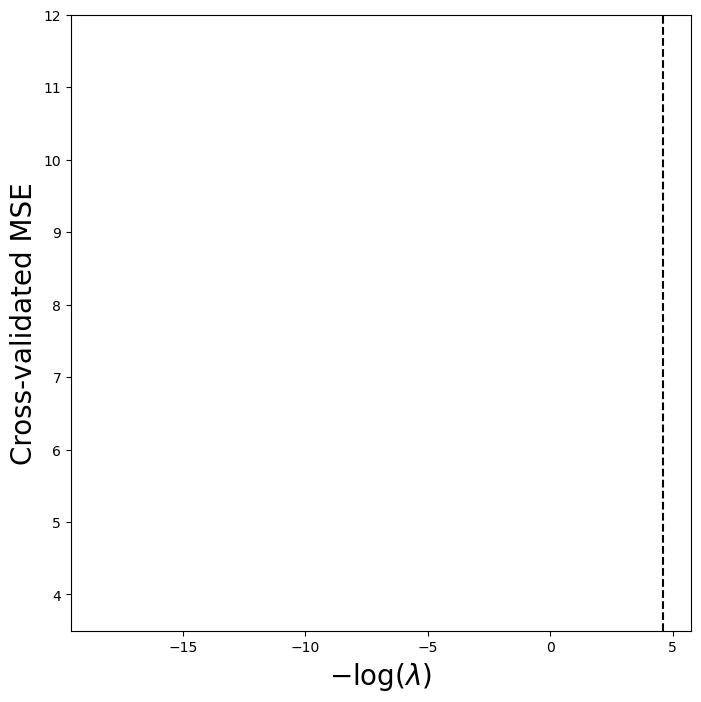

In [101]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([3.5,12])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [102]:
print('MSE: ', np.min(tuned_ridge.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_ridge.mse_path_.mean(1))/np.var(Y))

MSE:  0.33383358790783146
R2:  0.6661664120921685


In [103]:
tuned_ridge.coef_

array([ 0.157542  ,  0.30560109,  0.28042656,  0.14608983, -0.73002969,
       -0.14042114,  0.63410526,  0.11003672,  0.11217369])

In [104]:
tuned_ridge.intercept_

-1.5072755691754943e-15

### Test Error

In [105]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);

In [106]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')


C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26966.67260501807, tolerance: 5.393334709182349
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

In [107]:
-results['test_score']

array([0.32911754])

## Lasso

In [108]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.0007363281159801526

In [109]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

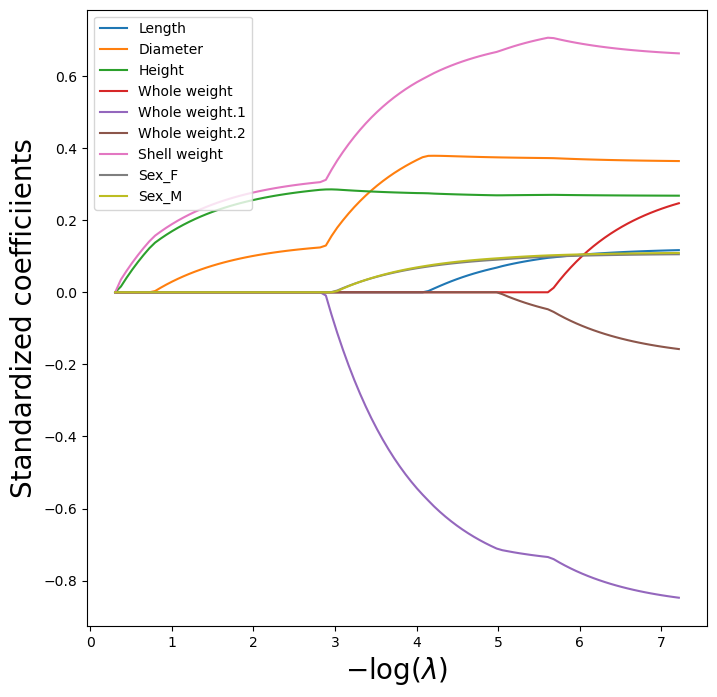

In [110]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

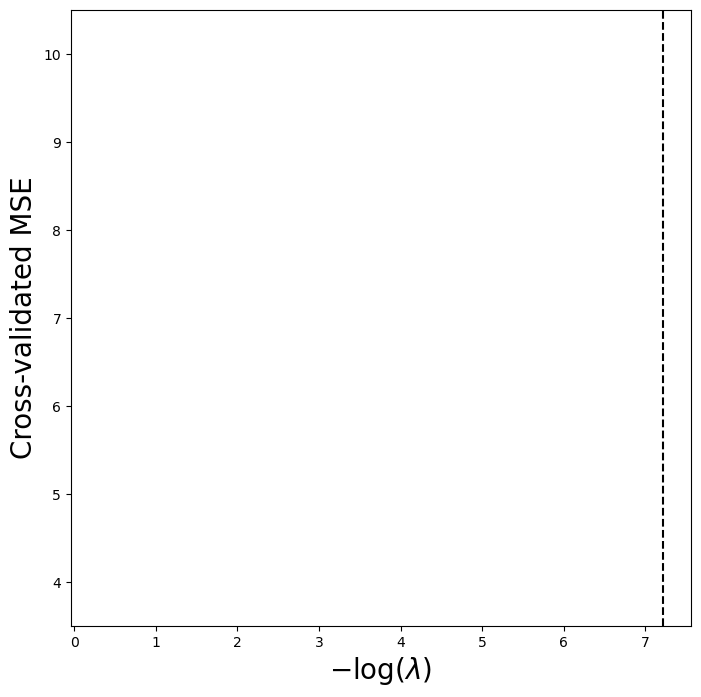

In [111]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([3.5,10.5])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [112]:
print('MSE: ', np.min(tuned_lasso.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_lasso.mse_path_.mean(1))/np.var(Y))

MSE:  0.3323772780789277
R2:  0.6676227219210723


In [113]:
tuned_lasso.coef_


array([ 0.11759532,  0.36335269,  0.26790631,  0.24700531, -0.84728373,
       -0.15752361,  0.66269495,  0.10544656,  0.10906026])

In [114]:
tuned_lasso.intercept_

-1.4810471744671968e-15

R squared training set 66.78
MSE 0.3321944391346528


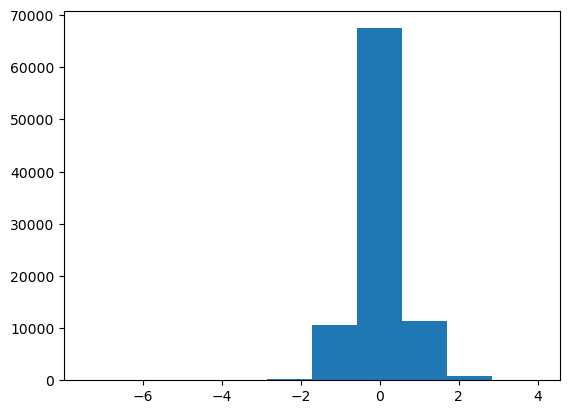

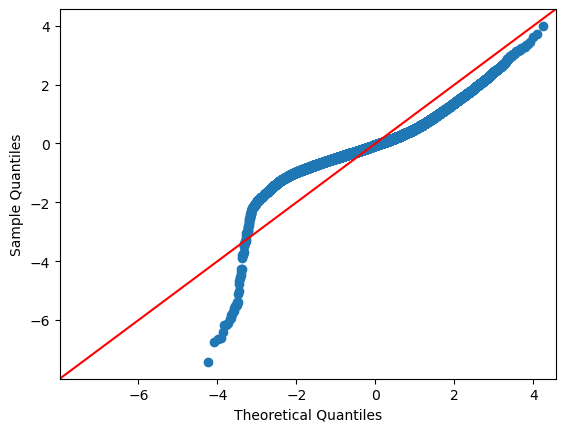

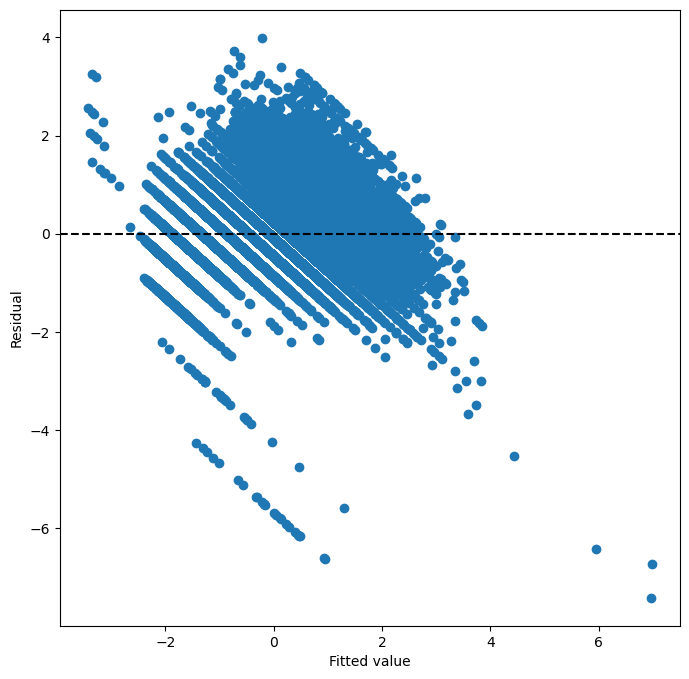

In [115]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Model Fit

R squared training set 66.78
MSE 0.3321944391346528


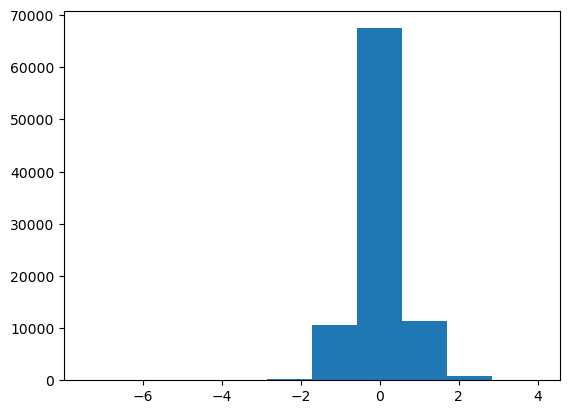

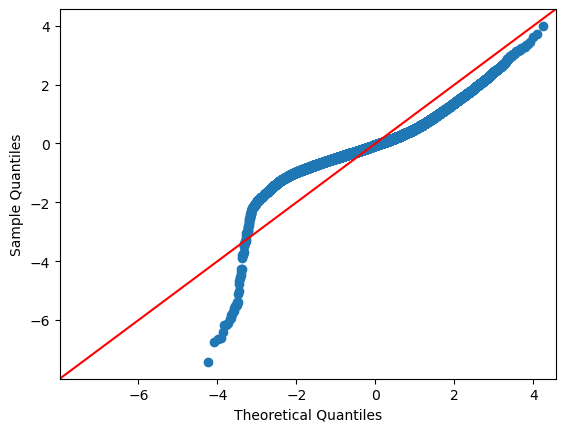

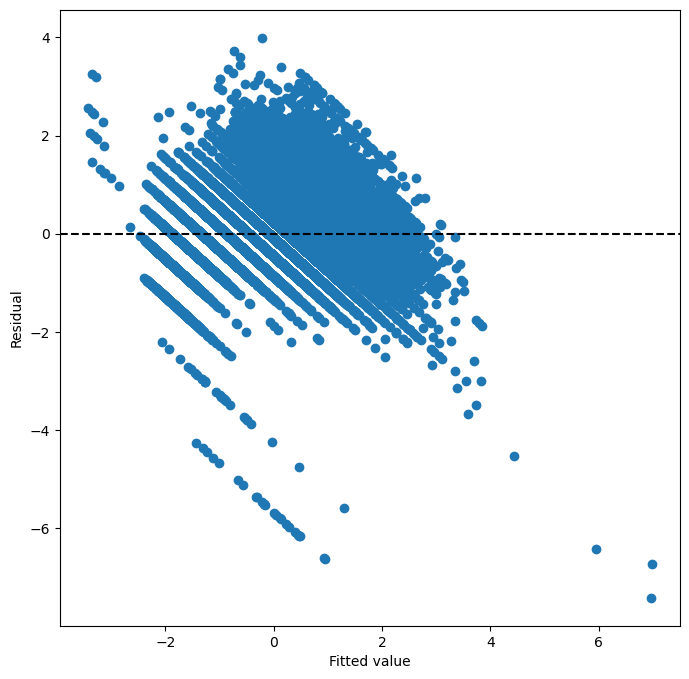

In [116]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Collinearity

In [119]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
Xs = pd.DataFrame(Xs)
vals = [VIF(Xs, i)
        for i in range(1, Xs.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=Xs.columns[1:])
vif

,vif
1,54.291324
2,7.813579
3,69.242348
4,21.463228
5,20.067845
6,18.339175
7,2.130961
8,2.018413


### Test MSE

In [68]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=1,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)]);

In [69]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')


In [70]:
-results['test_score']

array([0.32742912])

### Export Predictions

In [75]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
design = MS(test.columns.drop(['id', 'Sex_I'])).fit(test)
D = design.fit_transform(test)
D = D.drop('intercept', axis=1)
Xtest = np.asarray(D)

Xs_test = Xtest - Xtest.mean(0)[None,:]
Xtest_scale = Xtest.std(0)
Xs_test = Xs_test / Xtest_scale[None,:]

T_Rings = reg.predict(Xs_test)
print(T_Rings)
Rings = np.round(pt.inverse_transform(T_Rings.reshape(-1, 1)), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model3_redo.csv', index = False)

[-0.13421822  0.23844204  0.25290335 ...  0.31843254  1.19469535
 -0.33115284]
           id  Rings
0       90615    9.0
1       90616   10.0
2       90617   10.0
3       90618   11.0
4       90619    8.0
...       ...    ...
60406  151021    7.0
60407  151022    9.0
60408  151023   10.0
60409  151024   13.0
60410  151025    8.0

[60411 rows x 2 columns]


# Model 2: Principal Components

In [138]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.27433558, 0.00122285])

In [139]:
param_grid = {'pca__n_components': range(1, 10)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 10)},
             scoring='neg_mean_squared_error')

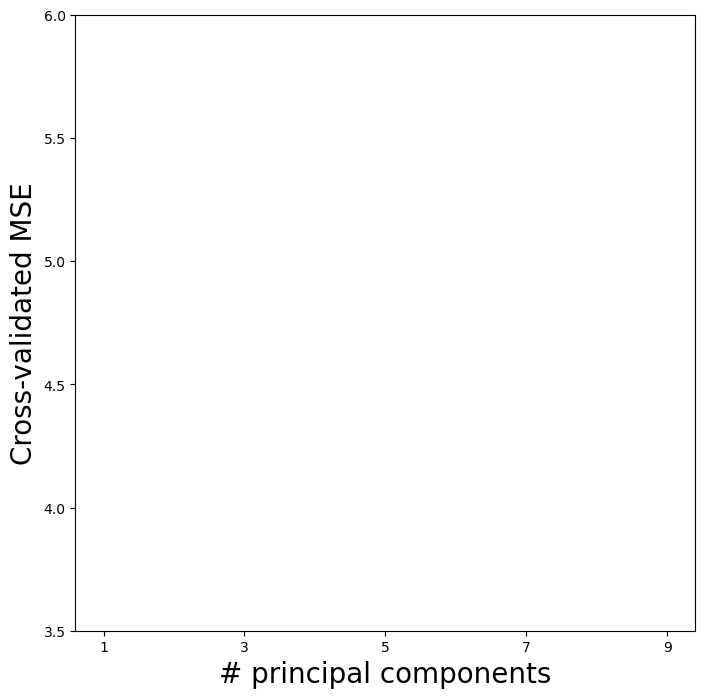

In [140]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([3.5,6]);

In [141]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()

1.0000008204658113

In [142]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.7562398 , 0.16247835])

### Model with 6 Compenents

In [143]:
pca = PCA(n_components=6)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.27433558, 0.00122285, 0.27115571, 0.54072645, 0.46871957,
       0.83893295])

In [144]:
pipe.named_steps['linreg'].intercept_

-1.4730929765396611e-15

https://builtin.com/data-science/step-step-explanation-principal-component-analysis  
And Frees Book

Code  
https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA  

In [145]:
X_new = pipe.named_steps['pca'].fit_transform(X)
print(X_new)

[[ 1.65738058e-01 -7.20411052e-01  2.69378083e-01  3.60856805e-02
   1.65894042e-02  1.48226041e-02]
 [ 5.37517930e-01 -7.00077376e-01  8.23155124e-02  3.42178102e-02
  -2.76081518e-03 -2.48672747e-02]
 [-1.07056919e+00 -1.17272492e-01  3.11634411e-02 -1.85922458e-01
  -1.01988901e-01  1.08479952e-02]
 ...
 [-6.81720575e-01 -9.54713518e-02 -1.53897375e-01  2.95594815e-02
   3.53590860e-02 -1.36008337e-02]
 [-8.24031272e-01 -1.03433286e-01 -8.49360903e-02 -2.52770624e-02
  -8.00198123e-03  1.14449936e-02]
 [-6.60727096e-01 -9.43924007e-02 -1.64697104e-01  2.44596808e-02
   1.29613216e-02 -4.77424442e-04]]


In [146]:
Y_pred = pipe.named_steps['linreg'].predict(X_new)
print(Y_pred)

[ 0.15735373  0.16527098 -0.42462513 ... -0.20772021 -0.25703557
 -0.20713425]


MSE 0.7838823951971886
R^2 0.2161176048028114


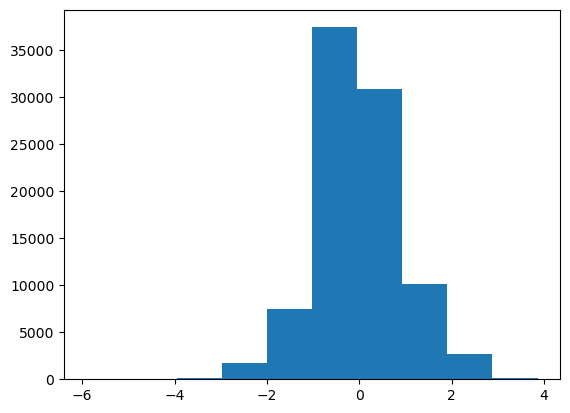

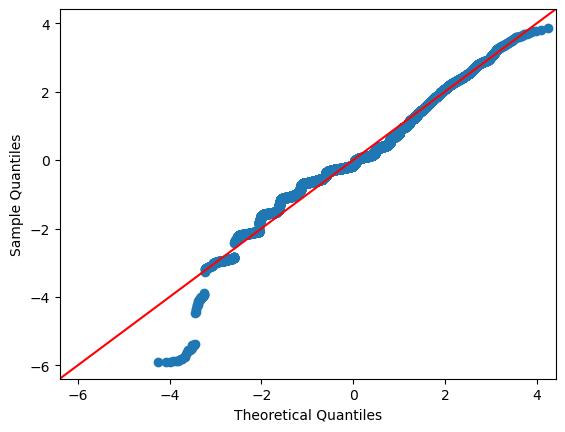

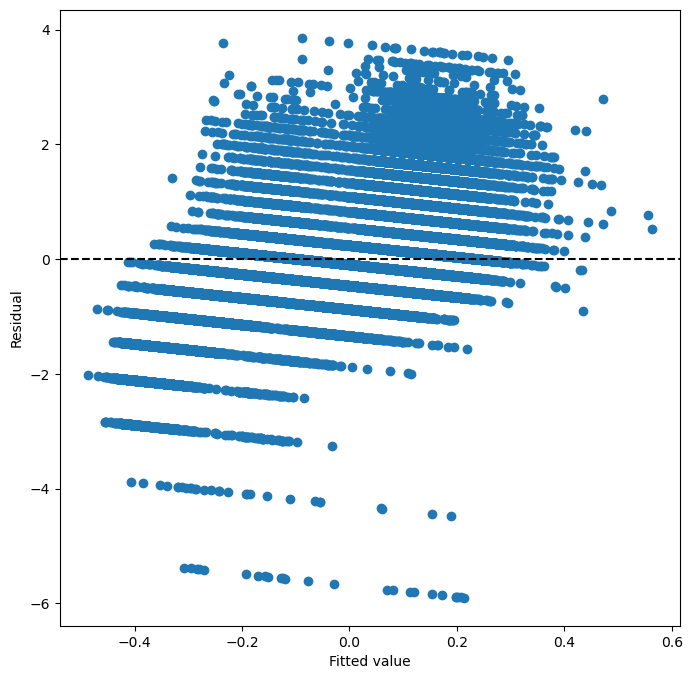

In [147]:
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))
print('R^2',1-np.mean(resid**2)/np.var(Y))

ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Collinearity

In [158]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
X_new = pd.DataFrame(X_new)
vals = [VIF(X_new, i)
        for i in range(1, X_new.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X_new.columns[1:])
vif

,vif
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


### Export Predictions

In [87]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
design = MS(test.columns.drop(['id', 'Sex_I'])).fit(test)
D = design.fit_transform(test)
D = D.drop('intercept', axis=1)
Xtest = np.asarray(D)

Xtest_new = pipe.named_steps['pca'].fit_transform(Xtest)

T_Rings = pipe.named_steps['linreg'].predict(Xtest_new)

Rings = np.round(pt.inverse_transform(T_Rings.reshape(-1, 1)), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model4_redo.csv', index = False)

           id  Rings
0       90615   10.0
1       90616   10.0
2       90617   10.0
3       90618   10.0
4       90619    9.0
...       ...    ...
60406  151021    9.0
60407  151022   10.0
60408  151023    9.0
60409  151024   10.0
60410  151025    9.0

[60411 rows x 2 columns]
